<a href="https://colab.research.google.com/github/KyraZzz/kaggle_trail/blob/main/Optics_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
#from GAE.GAE_IMPORTS import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
# import pingouin
import networkx as nx
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import torch
import pickle
import datetime
import traceback
import seaborn as sns

In [ ]:
import networkx as nx
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.colors

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ddf = pd.read_csv('/content/drive/MyDrive/Kaggle-competition/stock_optics/all_stocks_5yr.csv')

In [ ]:
ddf['return'] = (ddf['close'] - ddf['open']) * 100 / ddf['open']

In [ ]:
ddf[ddf['Name'] == 'AAL']

,date,open,high,low,close,volume,Name,return
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,-2.123424
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-2.887844
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-1.245675
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2.517483
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-6.358768
...,...,...,...,...,...,...,...,...
1254,2018-02-01,54.00,54.64,53.59,53.88,3623078,AAL,-0.222222
1255,2018-02-02,53.49,53.99,52.03,52.10,5109361,AAL,-2.598617
1256,2018-02-05,51.99,52.39,49.75,49.76,6878284,AAL,-4.289286
1257,2018-02-06,49.32,51.50,48.79,51.18,6782480,AAL,3.771290


In [ ]:
df = ddf.drop(['open','high','low','close','volume'],axis=1)
df

,date,Name,return
0,2013-02-08,AAL,-2.123424
1,2013-02-11,AAL,-2.887844
2,2013-02-12,AAL,-1.245675
3,2013-02-13,AAL,2.517483
4,2013-02-14,AAL,-6.358768
...,...,...,...
619035,2018-02-01,ZTS,1.275377
619036,2018-02-02,ZTS,-0.967367
619037,2018-02-05,ZTS,-3.666493
619038,2018-02-06,ZTS,0.728622


In [ ]:
matrix = df.set_index(['Name','date']).unstack('date').reset_index()

In [ ]:
column_names = ['Name']
column_names.extend(np.arange(matrix.shape[1]-1))

In [ ]:
matrix.columns = column_names

In [ ]:
matrix

,Name,0,1,2,3,4,5,6,7,8,...,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258
0,A,0.022188,-1.261899,-0.424012,-0.133899,-0.313059,-2.828887,1.895285,-1.400560,-1.210252,...,-0.417959,0.699865,0.067132,-1.351534,-0.460892,-0.478273,-1.479535,-3.725656,2.225209,-0.190644
1,AAL,-2.123424,-2.887844,-1.245675,2.517483,-6.358768,4.091888,-0.488486,-5.928017,-1.835536,...,-1.759259,-1.081081,-0.208373,0.266921,2.336096,-0.222222,-2.598617,-4.289286,3.771290,0.962483
2,AAP,0.714833,-0.330579,0.267891,0.088720,0.228833,0.215654,2.022245,-1.143994,-0.252334,...,-0.165125,0.243230,-0.510039,-1.891914,-2.394460,0.903304,-1.716701,-2.821760,3.620244,-1.927023
3,AAPL,0.206751,0.719832,-2.421264,-0.042850,0.445600,-1.853431,-0.240772,-1.931353,0.013498,...,-1.945503,-0.284884,-1.292901,0.872980,0.335591,0.367900,-3.313253,-1.640478,5.296131,-2.173713
4,ABBV,-0.329942,-0.774979,-0.978474,-0.423490,4.336662,1.760087,1.731486,1.179245,0.753442,...,2.218027,7.606987,0.666667,-2.964328,-3.433439,3.652887,-0.285714,-3.088496,5.995615,1.883070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,0.296187,1.291037,1.562500,0.928571,0.885897,0.212615,1.410437,-2.612330,-0.610413,...,0.438837,1.238095,-0.891049,0.315761,-1.365001,3.227586,0.947298,-3.403350,-0.446615,0.729620
501,YUM,2.511774,-0.936157,0.263239,-0.555813,-0.591256,0.266374,1.479751,-0.936014,1.213630,...,0.398500,0.606909,0.453014,-0.482353,-0.035453,-0.308642,-1.513707,-2.765932,2.846203,0.074934
502,ZBH,1.106372,-0.132013,-0.277594,0.343280,0.632745,-0.419837,0.488513,-0.738105,-1.703260,...,-0.850489,1.178262,0.871011,2.348639,0.386954,1.456272,-0.991736,-1.290167,1.074380,-0.715166
503,ZION,0.457761,0.289975,0.864909,0.650936,-0.202593,-1.696284,1.022913,-2.029221,-1.330561,...,-1.577873,1.217913,0.351852,0.409607,0.129726,2.212307,-1.132007,-3.530071,4.185677,3.427149


In [ ]:
d = 252
rolling_window = 252

In [ ]:
corr = np.corrcoef(matrix.loc[:,d-rolling_window:d+1])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity as cs

In [ ]:
corr_clean = np.nan_to_num(corr)
np.where(corr_clean[np.logical_or(corr_clean > 1, corr_clean < -1)])

(array([], dtype=int64),)

In [ ]:
dist = cs(corr_clean) / np.pi

In [ ]:
dist.shape

(505, 505)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
embedding = TSNE(n_components=2).fit_transform(dist)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
from sklearn.cluster import OPTICS

In [ ]:
minPts = int(len(dist) * 0.05)
clusters = OPTICS(min_samples=minPts,xi=0.001).fit(dist)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


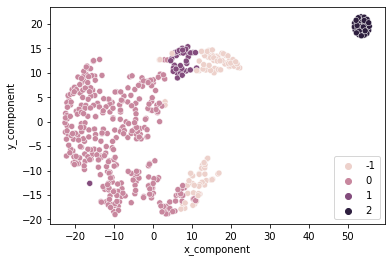

In [ ]:
df = pd.DataFrame()
df["x_component"]=embedding[:,0]
df["y_component"]=embedding[:,1]
    
fig,ax = plt.subplots()
sns.scatterplot(data=df, x="x_component", y="y_component",hue=clusters.labels_)
plt.show()

In [ ]:
space = np.arange(len(dist))
reachability = clusters.reachability_[clusters.ordering_]
labels = clusters.labels_[clusters.ordering_]

In [ ]:
matrix[clusters.labels_ == 1]['Name']

66     BF.B
80      CAG
94      CHD
109     CNP
115    COST
123     CTL
144     DPS
145     DRE
177     EXR
196     FRT
201     GGP
238     HSY
253     IRM
265       K
268     KIM
285     LLY
288     LNT
297     MAC
301     MCD
305    MDLZ
310     MKC
315      MO
336      NI
341     NRG
351     OKE
372     PLD
373      PM
392     REG
406    SBAC
413     SJM
420     SPG
423     SRE
433     SYY
434       T
435     TAP
472     VNO
Name: Name, dtype: object

## Plotting the change in total number of items

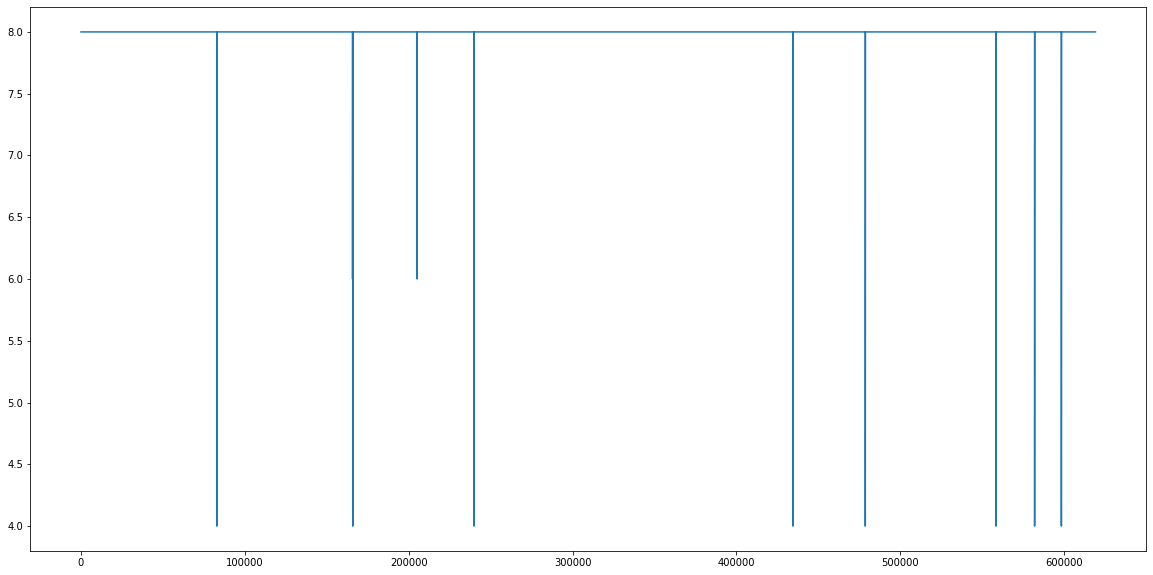

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from ipykernel import kernelapp as app


TypeError: ignored

<Figure size 1080x720 with 0 Axes>

In [ ]:
date = []
count = []
for index,row in ddf.iterrows():
    date.append(index)
    count.append(row.notna().sum())

counts_df = pd.DataFrame({'date':date,'count':count})
      
plt.figure(figsize=(20,10))
ax = plt.plot(counts_df['date'],counts_df['count'])
plt.show()

# findout when was the first big change
plt.figure(figsize=(15,10))
counts_df1 = counts_df[(counts_df['date']>pd.datetime(year=1977,month=6,day=1)) & (counts_df['date']<pd.datetime(year=1978,month=6,day=1))]
ax2 = plt.plot(counts_df1['date'],counts_df1['count'])
plt.show()

# findout when was the second change
plt.figure(figsize=(15,10))
counts_df2 = counts_df[(counts_df['date']>pd.datetime(year=1997,month=6,day=1)) & (counts_df['date']<pd.datetime(year=1998,month=6,day=1))]
ax2 = plt.plot(counts_df2['date'],counts_df2['count'])
plt.show()

Conclusion: for US CPI there was a major increase in no. of items in January, 1978, and then another major increase in January, 1998.

## Functions to create adjacency matrices from corr matrices
binarize = True makes adjacency matrix binary

In [ ]:
def apply_to_rolling(x,binarize = False,cutoff=None,absolute=False):
    mean = np.mean(x)
    std = np.std(x)
    cols = x.columns
    if absolute == True:
        x = x.abs()
    else:
        pass
    
    if cutoff == None:
        m = x.values<np.median(x.dropna())
    elif cutoff ==  'median' : 
        m = x.values<np.median(x.dropna())
        print(np.median(x.dropna()))
    elif cutoff ==  '75pctile' : 
        m = x.values<np.quantile(x.dropna(),q = 0.75)
    else : 
        m = x.values < cutoff
    
    if  binarize == False : 
        distance = x.values
        distance = (distance - mean) / std
    else : 
        distance = torch.ones(x.shape).numpy()
    distance[m]=0
    distance = pd.DataFrame(distance,index = cols,columns = cols)
    
    return  distance

## Produce corr-matrix and network for the full period

In [ ]:
def generate_data_full(dataframe,list_of_cutoffs = ['median'],rolling_data_apply = apply_to_rolling,
                            from_year = 1998,to_year = 2020,from_month = 1,to_month=12,binarize_list = ['True'],absolute=False):
    
    price_series = dataframe
    price_series = price_series[(price_series.index>=pd.datetime(year = from_year,month = from_month, day = 1))&((price_series.index<=pd.datetime(year = to_year,month = to_month, day = 31)))]
    price_series = price_series[price_series.columns].astype(float)
    # 1) find only products with complete months 2) extrapolate the missing months
    # fillna would use next valid value to fill nan
    inflation_series = (np.log(price_series)-np.log(price_series.shift(1))).fillna(method='bfill')

    for cutoff in list_of_cutoffs:

        CUTOFF = cutoff

        print('CUTOFF : ',CUTOFF)

        for binarize in binarize_list: # by default its unweighted graphs !! 
            error = 0

            # the exponential correlation  function ! 
            corrs_overtime = inflation_series.corr()
            try :
                # drop items which values are all nan
                corrs_overtime.dropna(axis=1, how='all',inplace=True)
                corrs_overtime.dropna(axis=0, how='all',inplace=True)

                corr_window = rolling_data_apply(corrs_overtime,binarize = binarize,cutoff = CUTOFF,absolute=absolute)
                G = nx.from_pandas_adjacency(corr_window)
                G.remove_edges_from(nx.selfloop_edges(G))
                
            except : 
                print('There is an error')
                break

            print(f'Done with cutoff:{cutoff}')
    return corrs_overtime,G

In [ ]:
corrmat,network = generate_data_full(ddf,from_year=2019,to_year=2021,rolling_data_apply = apply_to_rolling,
                                     binarize_list=['True'],list_of_cutoffs = [0.2])

In [ ]:
corrmat.shape

In [ ]:
!pip install sklearn
from sklearn.metrics.pairwise import cosine_similarity as cs

In [ ]:
dist = cs(corrmat) / np.pi

In [ ]:
dist.shape

In [ ]:
from sklearn.cluster import OPTICS

In [ ]:
minPts = int(len(dist) * 0.05)
clusters = OPTICS(min_samples=minPts).fit(dist)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
embedding = TSNE(n_components=2).fit_transform(dist)

In [ ]:
embedding.shape

In [ ]:
df = pd.DataFrame()
df["x_component"]=embedding[:,0]
df["y_component"]=embedding[:,1]
    
fig,ax = plt.subplots()
sns.scatterplot(data=df, x="x_component", y="y_component",hue=clusters.labels_)
plt.show()

In [ ]:
corrmat.columns[clusters.labels_ == 0]

In [ ]:
corrmat.columns[clusters.labels_ == 1]

In [ ]:
corrmat.columns[clusters.labels_ == 2]